$$
  \huge{\text{Teste Liliefors para Normalidade}}
$$

O test Liliefors para Normalidade, é utilizado para verificar se a amostra testada é proveniente de uma população normalmente distribuída.

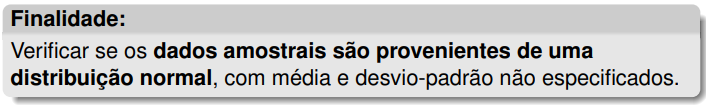

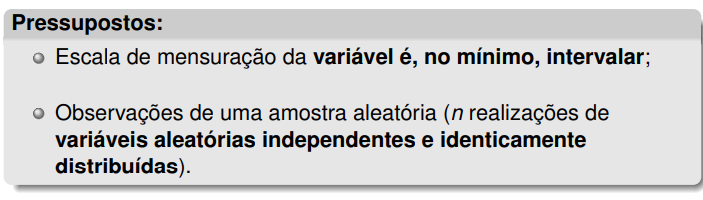

## Descrição dos Dados

O dadaset utilizado traz informção dos jogadores da NBA de 1996 a 2021, o foco será as idades dos jogadores.

In [3]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
data <- read.csv('all_seasons.csv')
head(data)

,X,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,⋯,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,0,Randy Livingston,HOU,22,193.04,94.80073,Louisiana State,USA,1996,2,⋯,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
2,1,Gaylon Nickerson,WAS,28,190.50,86.18248,Northwestern Oklahoma,USA,1994,2,⋯,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
3,2,George Lynch,VAN,26,203.20,103.41898,North Carolina,USA,1993,1,⋯,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
4,3,George McCloud,LAL,30,203.20,102.05820,Florida State,USA,1989,1,⋯,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
5,4,George Zidek,DEN,23,213.36,119.74829,UCLA,USA,1995,1,⋯,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
6,5,Gerald Wilkins,ORL,33,198.12,102.05820,Tennessee-Chattanooga,USA,1985,2,⋯,10.6,2.2,2.2,-5.8,0.031,0.064,0.203,0.503,0.143,1996-97


In [4]:
idades_data <- pull(data, age)
idades_data

[1] 22 28 26 30 23 33 26 30 24 24 22 31 29 33 28 26 25 24 34 31 31 33 28 32
   [25] 36 29 28 27 27 28 34 31 27 25 29 26 24 24 21 23 29 27 29 37 25 24 31 28
   [49] 39 31 24 22 26 24 27 23 27 27 34 35 35 24 32 27 40 31 35 23 33 27 21 24
   [73] 18 22 23 34 24 27 27 26 26 33 24 24 26 25 22 25 29 24 24 23 29 31 34 30
   [97] 25 38 34 27 27 31 33 23 24 25 27 29 29 26 24 35 28 23 24 35 25 28 36 30
  [121] 32 29 23 23 25 31 26 26 24 26 26 37 36 25 30 27 26 27 34 40 33 31 26 24
  [145] 23 31 38 30 27 25 31 30 37 27 23 31 28 23 24 23 24 27 27 30 29 32 28 39
  [169] 24 25 29 34 30 30 31 29 26 25 23 31 24 26 33 32 30 28 33 27 36 28 22 35
  [193] 29 24 30 29 24 29 26 29 31 29 27 35 23 26 25 31 20 25 27 25 25 30 28 30
  [217] 27 26 24 27 33 21 27 27 27 38 37 30 26 28 43 26 30 26 33 32 23 25 30 27
  [241] 27 33 36 20 29 23 23 30 31 26 33 23 27 24 29 22 29 30 25 31 24 29 34 22
  [265] 24 25 31 31 34 24 27 29 28 25 33 27 36 25 29 34 24 30 33 30 27 22 38 27
  [289] 30 28 23 24 31 33 26 31 26 28 27 29 24 21 27 24 29 27 28 28 22 27 23 23
  [313] 33 28 32 24 26 25 26 28 27 32 29 26 32 23 33 31 31 21 31 26 34 24 18 24
  [337] 27 36 24 28 32 23 32 33 26 29 25 32 27 23 34 27 34 30 28 31 27 23 32 24
  [361] 29 22 21 24 23 29 32 33 23 30 36 22 22 29 30 27 27 25 27 24 35 28 24 24
  [385] 34 25 33 32 26 25 23 32 26 29 29 22 33 32 25 32 29 24 22 32 25 34 29 28
  [409] 31 26 24 26 27 32 28 28 26 25 20 33 24 25 27 27 30 28 29 26 22 24 38 35
  [433] 27 25 30 25 27 31 24 23 25 26 30 33 33 31 26 27 33 31 28 26 29 35 25 29
  [457] 36 21 26 33 31 23 28 23 35 28 30 26 28 30 27 32 30 29 24 22 23 30 24 28
  [481] 32 34 29 31 35 28 24 23 28 37 27 30 29 25 28 25 19 23 25 35 27 25 32 22
  [505] 32 24 27 30 23 22 22 27 21 26 39 27 34 25 33 24 25 33 34 24 24 28 23 29
  [529] 27 29 30 28 22 30 28 27 31 38 29 27 26 19 30 30 28 25 24 22 29 25 31 39
  [553] 23 28 21 31 34 31 22 27 28 23 29 22 34 23 28 25 35 30 24 32 27 24 28 25
  [577] 30 23 31 32 26 32 25 30 35 25 35 30 26 23 30 32 30 27 32 23 22 37 34 28
  [601] 28 24 24 33 22 34 24 27 31 29 28 31 24 21 31 37 28 23 34 29 24 32 30 21
  [625] 27 28 29 34 31 22 26 26 28 26 25 26 30 28 34 28 23 31 25 27 23 28 39 23
  [649] 25 32 26 26 34 23 31 26 23 28 36 21 23 29 26 23 34 26 25 34 30 24 34 27
  [673] 25 32 30 24 27 30 32 22 31 31 39 26 32 24 37 29 25 24 29 27 36 25 31 27
  [697] 33 31 23 30 21 27 22 34 23 35 23 28 27 28 31 26 25 38 27 27 25 27 27 32
  [721] 30 26 24 22 29 24 23 23 24 30 25 23 33 26 35 29 30 29 32 27 34 25 27 25
  [745] 28 33 23 26 25 24 34 32 28 30 23 33 23 33 29 41 37 23 27 22 24 25 25 23
  [769] 34 30 27 27 28 30 28 35 24 32 31 40 32 32 27 35 25 26 27 25 25 25 23 25
  [793] 34 30 28 24 34 24 22 36 32 28 33 22 36 35 28 25 27 23 25 36 19 23 25 35
  [817] 32 30 29 30 25 32 26 22 33 30 25 31 28 28 25 24 23 29 39 32 28 32 26 35
  [841] 31 30 36 23 34 23 23 29 24 26 31 30 25 29 22 34 29 31 25 31 27 23 29 33
  [865] 25 30 24 30 29 25 26 27 28 30 24 25 22 24 25 29 31 21 32 32 36 27 33 37
  [889] 29 29 25 26 29 32 26 31 34 23 30 39 24 28 30 23 23 23 30 38 22 25 33 40
  [913] 32 32 23 33 31 33 26 28 35 25 32 30 35 38 24 40 26 30 26 26 33 31 30 27
  [937] 26 36 33 33 41 32 33 36 26 29 29 28 22 26 31 32 27 28 23 31 30 27 31 28
  [961] 29 26 25 26 23 25 31 26 24 31 26 34 30 24 28 32 35 25 30 21 37 22 24 30
  [985] 27 24 35 34 24 34 31 26 24 34 27 36 31 30 33 28 26 29 26 24 24 24 35 26
 [1009] 27 29 24 28 19 26 28 24 29 24 24 23 26 33 33 27 23 29 27 29 22 23 28 22
 [1033] 26 24 25 31 24 34 31 29 29 33 35 26 27 29 35 31 28 32 28 23 33 23 35 24
 [1057] 27 30 23 25 27 33 23 28 19 30 26 24 28 27 32 28 23 29 24 36 24 28 23 24
 [1081] 26 32 28 25 35 23 34 23 23 25 23 29 23 22 29 38 23 28 31 33 31 23 29 26
 [1105] 25 27 22 35 27 30 32 22 36 25 21 22 30 26 33 29 23 23 31 28 24 24 23 23
 [1129] 31 33 28 31 29 27 29 40 19 19 29 29 32 27 26 24 30 25 23 36 31 23 22 23
 [1153] 33 20 27 32 24 31 23 26 29 25 28 33 25 31 24 22 27 31 23 30 29 22 31 33
 [1177] 25 30 35 24 29 38 32 25 27 36 26 38 23 32 32 22 23 24 29 32 30 31 36 24
 [12

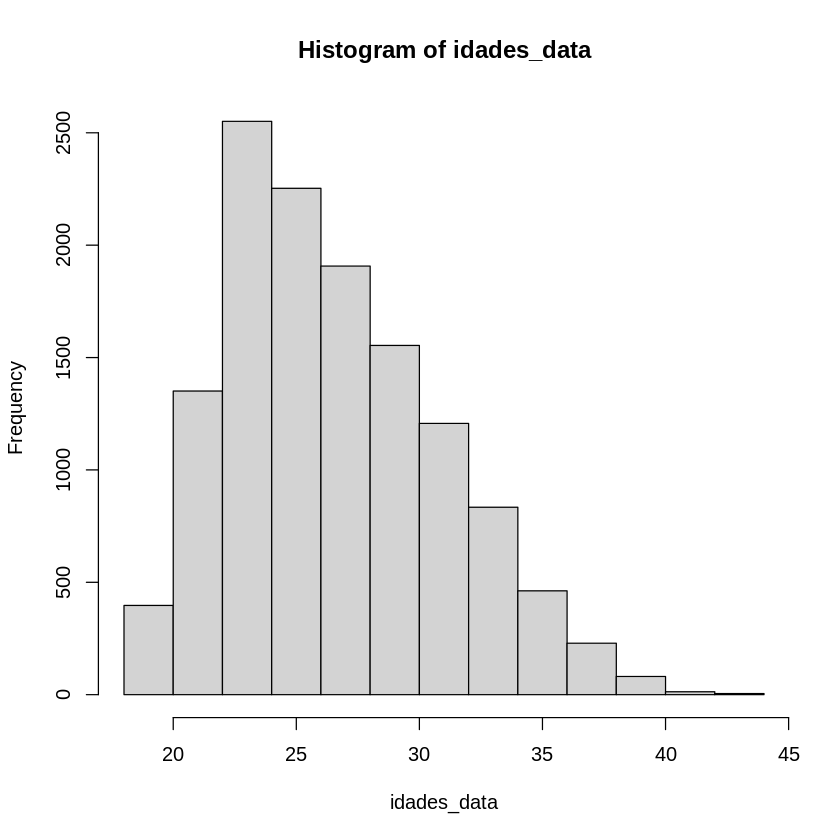

In [6]:
hist(idades_data)

## Hipóteses

Queremos verificar se as idades dos jogadores na NBA foram provenientes de uma populção normalmente distribuída.

$$
H_0: \text{a idades dos jogadores da NBA seguem uma distribuição normal}
$$
$$
H_1: \text{a idades dos jogadores da NBA não seguem uma distribuição normal}
$$

## Aplicação do Teste

In [9]:
install.packages('nortest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
library(nortest)

lillie.test(idades_data)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  idades_data
D = 0.10906, p-value < 2.2e-16
